In [1]:
#Project initially compiling information about beer habits from untappd API, with possibility of making recommendation system

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import http.client 
import json
import pprint
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
from scipy import stats
from scipy.stats import t
from datetime import datetime
import csv
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip3 install geopandas

In [ ]:
!conda install -c conda-forge gdal -y

In [3]:
import sys
sys.executable

'/home/ubuntu/anaconda3/bin/python'

In [ ]:
!pip3 install pyproj

In [4]:
!pip3 install wheel

!pip3 install numpy
!pip3 install pandas
!pip3 install shapely
!pip3 install gdal
!pip3 install fiona
!pip3 install pyproj
!pip3 install six
!pip3 install rtree
!pip3 install geopandas

     |████████████████████████████████| 604 kB 4.4 MB/s eta 0:00:01     |█████████████▋                  | 256 kB 4.4 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /home/ubuntu/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qc4h4nn_/gdal/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qc4h4nn_/gdal/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-hp33z7y5
         cwd: /tmp/pip-install-qc4h4nn_/gdal/
    Complete output (118 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-hp33z7y5/GDAL.egg-info
    writing /tmp/pip-pip-egg-info-hp33z7y5/GDAL.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-hp33z7y5/GDAL.egg-info/dependency_links.txt
    writing requirements to /tmp/pip-pip-egg-info-hp33z7y5/GDAL.egg-in

In [4]:
f = open('client.txt')
for line_counter, line in enumerate(f.readlines()):
#     print(line)
    if(line_counter == 0):
        client_id = str(line).strip()
    if(line_counter == 1):
        client_secret = str(line).strip()
print(client_id)       
print(client_secret)
f.close()


6D2AAB5EC9DDD9F3EE8289B7D899F9AEA36E4BBB
AA7B434A5516D89F95F1E950BCFA663245C32BBF


In [3]:
url = f"https://api.untappd.com/v4/user/info/gregavola?client_id={client_id}&client_secret={client_secret}"
print(url)
# https://api.untappd.com/v4/user/checkins/gregavola?client_id=6D2AAB5EC9DDD9F3EE8289B7D899F9AEA36E4BBB&client_secret=AA7B434A5516D89F95F1E950BCFA663245C32BBF

NameError: name 'client_id' is not defined

In [ ]:
print("hello")

In [11]:
response = requests.request("GET", url)#, auth = (client_id, client_secret)) 
response_json = response.json()
print(response.status_code)

200


In [ ]:
pprint.pprint(response_json["response"]["user"]["checkins"])

In [12]:
def getUserInfo(username):
    url = f"https://api.untappd.com/v4/user/info/{username}?client_id={client_id}&client_secret={client_secret}"
    
    response = requests.request("GET", url) 
    if(response.status_code == 404):
        print("Connection not made, returning nothing")
        return 0
    if(response.status_code == 200):      
        print(f"Response code is {response.status_code}, all is well")
    response_json = response.json()
    
    return response_json
    

In [13]:
getUserInfo("gregavola")

Response code is 200, all is well


{'meta': {'code': 200,
  'response_time': {'time': 0.119, 'measure': 'seconds'},
  'init_time': {'time': 0, 'measure': 'seconds'}},
 'notifications': [],
 'response': {'user': {'uid': 1,
   'id': 1,
   'user_name': 'gregavola',
   'first_name': 'Greg',
   'last_name': 'A.',
   'user_avatar': 'https://gravatar.com/avatar/0c6922e238dae5cccce96a32889fc911?size=100&d=https%3A%2F%2Funtappd.akamaized.net%2Fsite%2Fassets%2Fimages%2Fdefault_avatar_v3_gravatar.jpg%3Fv%3D2',
   'user_avatar_hd': 'https://gravatar.com/avatar/0c6922e238dae5cccce96a32889fc911?size=125&d=https%3A%2F%2Funtappd.akamaized.net%2Fsite%2Fassets%2Fimages%2Fdefault_avatar_v3_gravatar.jpg%3Fv%3D2',
   'user_cover_photo': 'https://untappd.akamaized.net/coverphoto/933f9eebffb9151299188512cbd5981b.jpg',
   'user_cover_photo_offset': 214,
   'is_private': 0,
   'rating_bump': 0,
   'location': 'Connecticut',
   'url': 'http://gregavola.com',
   'bio': 'Co-Founder and CCO of Untappd, Developer, Beer Drinker & Community Guy',
   '

In [ ]:
def getDistinctBeers(username):
    url = f"https://api.untappd.com/v4/user/beers/{username}?client_id={client_id}&client_secret={client_secret}"
    
    response = requests.request("GET", url) 
    if(response.status_code == 404):
        print("Connection not made, returning nothing")
        return 0
    if(response.status_code == 200):      
        print(f"Response code is {response.status_code}, all is well")
    response_json = response.json()
    
    return response_json
    

In [ ]:
distinct_beers_json = getDistinctBeers("conorhamill36")

In [ ]:
pprint.pprint(distinct_beers_json["response"])

In [ ]:
# pprint.pprint(distinct_beers_json["response"]["beers"]["items"])
print(len(distinct_beers_json["response"]["beers"]["items"]))

In [ ]:
# for beer in distinct_beers_json["response"]["beers"]["items"]:
# #     pprint.pprint(beer["beer"])
#     pprint.pprint(beer["beer"]["beer_abv"])
#     pprint.pprint(beer["beer"]["beer_ibu"])
#     pprint.pprint(beer["beer"]["beer_style"])
#     pprint.pprint(beer["beer"]["rating_score"])
next_url = distinct_beers_json["response"]["pagination"]["next_url"]    

In [5]:
#Returns dataframe of information on user's beers
def getUsersDistinctBeers(username, pages = 1):
    users_distinct_beer_data = []
    users_distinct_beer_data_headings = []
    
    url = f"https://api.untappd.com/v4/user/beers/{username}?limit=50&client_id={client_id}&client_secret={client_secret}"

    for page in range(0, pages):
        print(page)
        if(page > 0):
            url = f"https://api.untappd.com/v4/user/beers/{username}?limit=50&offset={int(page*50)}&client_id={client_id}&client_secret={client_secret}"
        print(f"url is {url}") 
        response = requests.request("GET", url) 
        
        if(response.status_code == 404):
            print("Connection not made, returning nothing")
            return 0
        if(response.status_code == 200):      
            print(f"Response code is {response.status_code}, all is well")
        distinct_beers_json = response.json()
        

        #return response_json
        for beer in distinct_beers_json["response"]["beers"]["items"]:
#             pprint.pprint(beer["beer"])
            beer_abv = beer["beer"]["beer_abv"]
            beer_ibu = beer["beer"]["beer_ibu"]
            beer_style = beer["beer"]["beer_style"]
            rating_score = beer["beer"]["rating_score"]
            user_rating_score = beer["rating_score"]
            brewery_id = beer["brewery"]["brewery_id"]
            brewery_name = beer["brewery"]["brewery_name"]
            country_name = beer["brewery"]["country_name"]
            brewery_lat = beer["brewery"]["location"]["lat"]
            brewery_lng = beer["brewery"]["location"]["lng"]
                        
            print(beer_abv, beer_ibu, beer_style, rating_score)
            users_distinct_beer_data.append([beer_abv, beer_ibu, beer_style, rating_score, user_rating_score, brewery_id, brewery_name, country_name, brewery_lat, brewery_lng])
    users_distinct_beer_data_headings = ['beer_abv', 'beer_ibu', 'beer_style', 'rating_score', "user_rating_score", "brewery_id", "brewery_name", "country_name", "brewery_lat", "brewery_lng"]
    
    return users_distinct_beer_data, users_distinct_beer_data_headings

In [6]:
users_distinct_beer_data, users_distinct_beer_data_headings = getUsersDistinctBeers("conorhamill36", pages = 5)

0
url is https://api.untappd.com/v4/user/beers/conorhamill36?limit=50&client_id=6D2AAB5EC9DDD9F3EE8289B7D899F9AEA36E4BBB&client_secret=AA7B434A5516D89F95F1E950BCFA663245C32BBF
Response code is 200, all is well
5 0 Pale Ale - New England 3.89603
6 0 Pale Ale - American 3.76883
9.2 150 IPA - Imperial / Double 3.70961
7 0 IPA - New England 4.14966
6 0 IPA - American 4.03305
4.8 28 Pilsner - German 3.20587
0.5 0 Non-Alcoholic Beer 3.02705
5.2 35 Pale Ale - New Zealand 3.55718
6.5 0 IPA - New England 3.76815
7 60 IPA - American 3.92236
4 0 Lager - Vienna 3.29449
3.5 0 Sour - Fruited Berliner Weisse 3.44071
4.5 0 Gluten-Free 3.08339
6.6 0 IPA - New England 4.03938
7 0 IPA - New England 4.05505
4.2 0 Pale Ale - American 3.44344
4.3 32 Golden Ale 3.40779
4.4 40 Pale Ale - American 3.39798
10 0 Stout - Imperial / Double 3.93749
4.7 20 IPA - Milkshake 3.57809
4.7 0 Pale Ale - International 3.42258
4.2 0 Red Ale - American Amber / Red 3.326
4.4 13 Bock - Single / Traditional 3.48732
6.5 60 IPA - 

In [8]:
# print(users_distinct_beer_data_headings)
beer_df = pd.DataFrame(users_distinct_beer_data, columns = users_distinct_beer_data_headings)
beer_df

,beer_abv,beer_ibu,beer_style,rating_score,user_rating_score,brewery_id,brewery_name,country_name,brewery_lat,brewery_lng
0,5.0,0,Pale Ale - New England,3.89603,4.25,373345,Polly's Brew Co.,Wales,53.1883,-3.13665
1,6.0,0,Pale Ale - American,3.76883,4.00,400105,Overtone Brewing Co,Scotland,55.8917,-4.37882
2,9.2,150,IPA - Imperial / Double,3.70961,4.00,241,BrewDog,Scotland,57.3716,-2.04834
3,7.0,0,IPA - New England,4.14966,4.25,400105,Overtone Brewing Co,Scotland,55.8917,-4.37882
4,6.0,0,IPA - American,4.03305,4.25,400105,Overtone Brewing Co,Scotland,55.8917,-4.37882
...,...,...,...,...,...,...,...,...,...,...
215,4.0,34,Stout - Irish Dry,3.50364,2.75,1418,Heineken Ireland,Ireland,51.9037,-8.47246
216,5.2,35,IPA - American,3.74743,4.00,241,BrewDog,Scotland,57.3716,-2.04834
217,5.2,28,Scottish Ale,3.58707,3.50,98,Belhaven Brewery,Scotland,55.9933,-2.50964
218,4.6,0,Lager - Vienna,3.56904,3.25,96768,Pilot,Scotland,55.9751,-3.16624


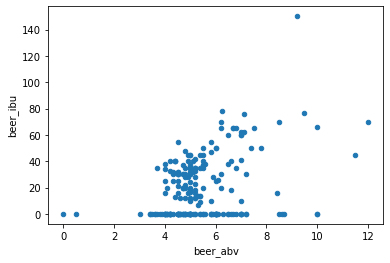

In [17]:
beer_df.plot.scatter(x = 'beer_abv', y = 'beer_ibu', legend = 'beer_style')

AttributeError: 'PathCollection' object has no property 'legend'

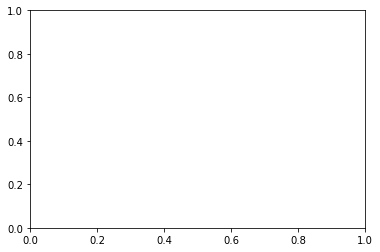

In [18]:
#Need to call matplotlib for each group
plt.scatter(x = beer_df['beer_abv'], y = beer_df['beer_ibu'], legend = beer_df['beer_style'])

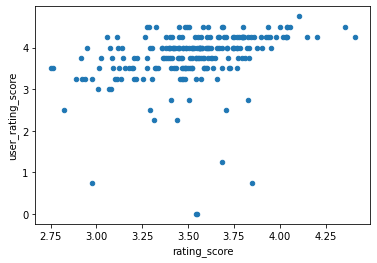

In [19]:
beer_df.plot.scatter(x = 'rating_score', y = 'user_rating_score')

In [20]:
beer_df.describe()

,beer_abv,beer_ibu,rating_score,user_rating_score,brewery_id,brewery_lat,brewery_lng
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,5.395682,20.959091,3.523996,3.767045,65835.372727,48.146508,-14.280656
std,1.468293,22.969568,0.289870,0.668087,109729.687507,12.835277,48.435296
min,0.000000,0.000000,2.750960,0.000000,49.000000,-41.501800,-123.806000
25%,4.500000,0.000000,3.380700,3.500000,1349.000000,42.284300,-8.472460
50%,5.000000,17.000000,3.525580,4.000000,5859.000000,52.241100,-3.182260
75%,6.000000,35.000000,3.707593,4.250000,109103.750000,55.872500,-0.126125
max,12.000000,150.000000,4.410450,4.750000,451595.000000,61.998500,173.960000


In [7]:
beer_df['country_name'].value_counts()

NameError: name 'beer_df' is not defined

In [17]:
#Need to remove (0, 0) lat and long - error
def plotBreweryMap(beer_df):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    geometry = [Point(xy) for xy in zip(beer_df["brewery_lng"], beer_df["brewery_lat"])]
    geo_df = gpd.GeoDataFrame(beer_df, geometry = geometry)
    fig, ax = plt.subplots(figsize = (15, 15))
    world.plot(ax = ax)
    geo_df.plot(ax = ax, color = 'red')
    return

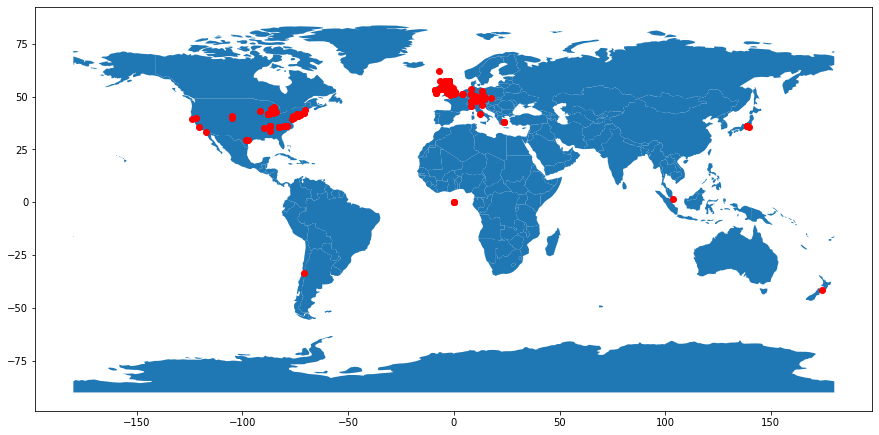

In [16]:
plotBreweryMap(beer_df)

In [33]:
print(beer_df.beer_style.value_counts()[-10:])
print(beer_df.beer_style.value_counts()[:15])

Lager - Dortmunder / Export    1
Pale Ale - Belgian             1
Non-Alcoholic Beer             1
Table Beer                     1
Stout - American               1
IPA - White                    1
Porter - Other                 1
Rauchbier                      1
Scotch Ale / Wee Heavy         1
Scottish Export Ale            1
Name: beer_style, dtype: int64
IPA - American                       28
Pale Ale - American                  15
Lager - Pale                         15
IPA - Session / India Session Ale    13
IPA - New England                    11
Pilsner - Other                       6
Red Ale - American Amber / Red        6
Blonde Ale                            6
Pilsner - German                      6
IPA - Imperial / Double               5
Lager - Euro Pale                     5
Hefeweizen                            5
Lager - Vienna                        4
IPA - English                         4
Wheat Beer - Witbier                  4
Name: beer_style, dtype: int64


In [27]:
# beer_df.beer_style.replace
style_dict = {'beer_style':{'IPA - White' : 'IPA', 
                           'Pilsner - Other' : 'Pilsner',
                           'Pilsner - German' : 'Pilsner',
                           'Pilsner - Czech' : 'Pilsner',
                           } }
beer_df.replace(style_dict).beer_style.value_counts()[:20]

IPA - American                       28
Pale Ale - American                  15
Lager - Pale                         15
IPA - Session / India Session Ale    13
Pilsner                              12
IPA - New England                    11
Blonde Ale                            6
Red Ale - American Amber / Red        6
IPA - Imperial / Double               5
Hefeweizen                            5
Lager - Euro Pale                     5
Wheat Beer - Witbier                  4
Stout - Milk / Sweet                  4
IPA - English                         4
Gluten-Free                           4
Pale Ale - New England                4
Lager - Vienna                        4
Pilsner - Czech                       4
Stout - Imperial / Double             3
English Bitter                        3
Name: beer_style, dtype: int64

In [81]:
#Doing a quick anf dirty way with regex
# beer_df.replace(to_replace = r'^Pale', value = 'Pale Ale', regex = True).beer_style.value_counts()[:20]
new_beer_df = beer_df
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Pale Ale.*$)', 'Pale Ale')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*IPA.*$)', 'IPA')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Lager.*$)', 'Lager')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Wheat.*$)', 'Wheat Beer')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Sour.*$)', 'Sour')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Pilsner.*$)', 'Pilsner')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Red.*$)', 'Red Ale')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Stout.*$)', 'Stout')
new_beer_df.beer_style = beer_df.beer_style.str.\
replace(r'(^.*Porter.*$)', 'Porter')





# value_counts()[:20]
# replace(r'(^.*Pilsner.*$)', 'Pilsner').\
# replace(r'(^.*IPA*$)', 'IPA').\
# replace(r'(^.*Pale Ale.*$)', 'Pale Ale').value_counts()[:20]
# beer_df.beer_style.value_counts()[:20]
new_beer_df.beer_style.value_counts()[-20:]

Gluten-Free                    4
Sour                           3
Golden Ale                     3
English Bitter                 3
Farmhouse Ale - Saison         2
Brown Ale - American           2
Scottish Ale                   2
Non-Alcoholic Beer             1
Rye Beer                       1
Barleywine - American          1
Belgian Tripel                 1
Rauchbier                      1
Scotch Ale / Wee Heavy         1
Gruit / Ancient Herbed Ale     1
Fruit Beer                     1
Kellerbier / Zwickelbier       1
Dunkelweizen                   1
Table Beer                     1
Scottish Export Ale            1
Bock - Single / Traditional    1
Name: beer_style, dtype: int64

In [116]:
#Plotting scatter plot
# beer_df.plot.scatter(x = 'beer_abv', y = 'beer_ibu')
# beer_df.groupby(by='beer_style').size() > 3  #mean().reset_index().sort_values('user_rating_score', ascending = False)
# beer_df.groupby(by='beer_style').mean().where(size() > 3)
# beer_df.groupby(by='beer_style').mean().reset_index().\
# sort_values('user_rating_score', ascending = False).\
# plot.bar(x = 'beer_style', y = 'user_rating_score')

# beer_df.groupby(by='beer_style').mean().reset_index().\
# sort_values('user_rating_score', ascending = False)


beer_df.groupby(by='beer_style').count().reset_index().\
sort_values('user_rating_score', ascending = False)

,beer_style,beer_abv,beer_ibu,rating_score,user_rating_score,brewery_id,brewery_name,country_name,brewery_lat,brewery_lng,geometry
13,IPA,69,69,69,69,69,69,69,69,69,69
15,Lager,32,32,32,32,32,32,32,32,32,32
17,Pale Ale,28,28,28,28,28,28,28,28,28,28
18,Pilsner,16,16,16,16,16,16,16,16,16,16
27,Stout,14,14,14,14,14,14,14,14,14,14
21,Red Ale,8,8,8,8,8,8,8,8,8,8
29,Wheat Beer,6,6,6,6,6,6,6,6,6,6
2,Blonde Ale,6,6,6,6,6,6,6,6,6,6
12,Hefeweizen,5,5,5,5,5,5,5,5,5,5
19,Porter,4,4,4,4,4,4,4,4,4,4
